In [1]:
import nilearn
import numpy as np
import pandas as pd
import networkx as nx

C:\Users\USER\AppData\Local\Temp\ipykernel_20292\470861835.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
from nilearn import datasets

# Fetch the ABIDE dataset (preprocessed) from nilearn
abide_dataset = datasets.fetch_abide_pcp(n_subjects=1,pipeline="cpac")

# Check the downloaded files
print("ABIDE dataset downloaded. Files:")
print(abide_dataset["func_preproc"])  # This should list paths to the functional MRI data files (.gz)

In [ ]:
from nilearn import datasets
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

In [59]:
from nilearn.maskers import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)


In [60]:
abide_dataset["func_preproc"][0]

'C:\\Users\\USER\\nilearn_data\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050003_func_preproc.nii.gz'

In [61]:
time_series = masker.fit_transform(abide_dataset["func_preproc"][0])

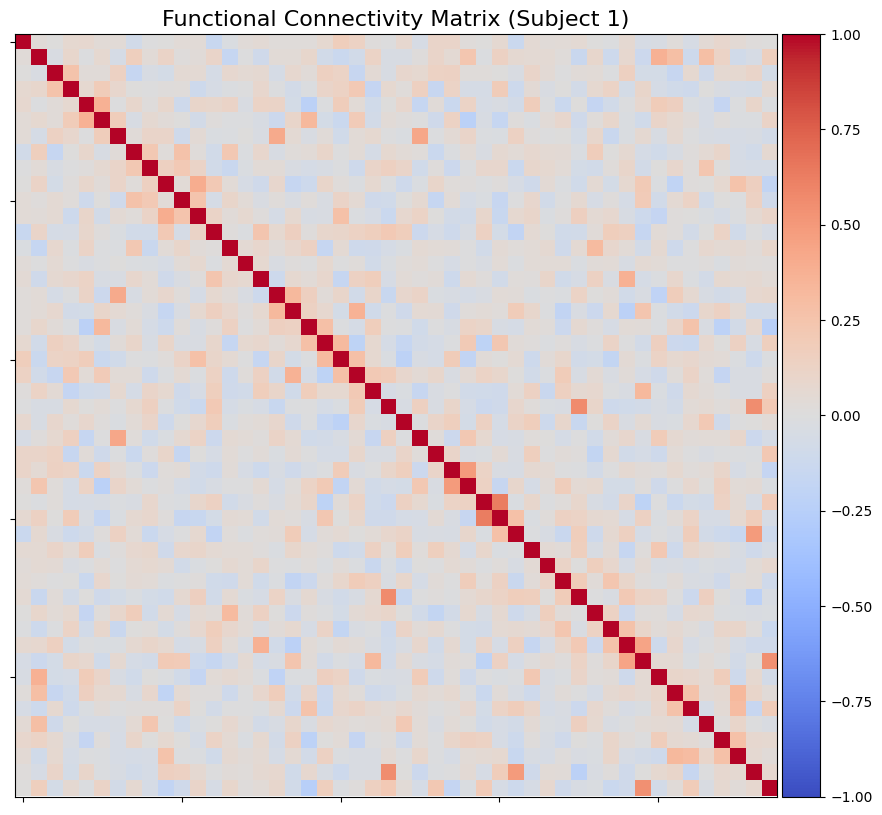

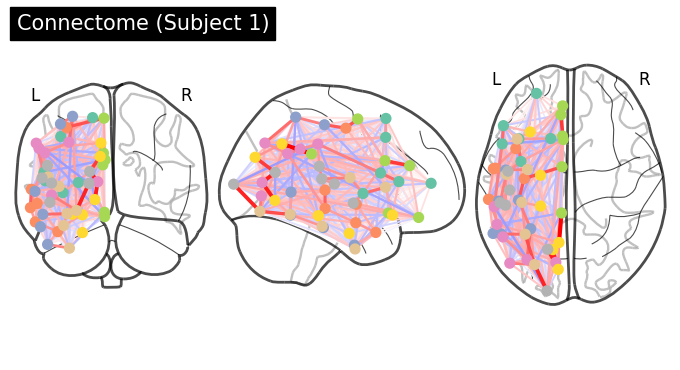

In [64]:
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets, input_data, plotting

connectome = ConnectivityMeasure(kind='partial correlation')
correlation_matrix = connectome.fit_transform([time_series])[0]

plotting.plot_matrix(correlation_matrix, 
                     figure=(10, 8),  # Size of the plot
                     vmax=1, vmin=-1,  # Limits for the color scale
                     title="Functional Connectivity Matrix (Subject 1)", 
                     cmap='coolwarm',  # Color map for the matrix
                     colorbar=True)


# Step 6: Get the coordinates of the ROIs
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)
# Step 7: Plot the connectome with an edge threshold (e.g., 80% of the strongest edges)
left_connectome = plotting.plot_connectome(
    correlation_matrix, coordinates, edge_threshold="10%", title="Connectome (Subject 1)",display_mode="ortho"
)

# Step 8: Show the plot


In [63]:
from nilearn import plotting

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=dataset)

# plot connectome with 80% edge strength in the connectivity
left_connectome = plotting.plot_connectome(
    correlation_matrices, coordinates, edge_threshold="80%"
)


ValueError: File not found: 'filename'